In [1]:
from pandas import *
from numpy import *

In [2]:
DataFirst = read_csv("data1.csv",encoding="gbk")
DataSecond = read_csv("data2.csv",encoding="gbk")
DataThird = read_csv("data3.csv",encoding="gbk")
DataThird.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387144 entries, 0 to 387143
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      387144 non-null  object
 1   login_time   387144 non-null  object
 2   login_place  387144 non-null  object
dtypes: object(3)
memory usage: 8.9+ MB


In [3]:
#数据预处理,先处理缺失值
DataFirst.isnull().sum()
DataFirst = DataFirst.dropna(axis=0)
DataFirst.isnull().sum()

user_id             0
course_id           0
course_join_time    0
learn_process       0
price               0
dtype: int64

In [4]:
DataSecond.isnull().sum()
DataSecond = DataSecond.dropna(axis=0)
DataSecond.isnull().sum()

user_id                   0
register_time             0
recently_logged           0
number_of_classes_join    0
number_of_classes_out     0
learn_time                0
school                    0
dtype: int64

In [5]:
DataThird.isnull().sum()
DataThird = DataThird.dropna(axis=0)
DataThird.isnull().sum()

user_id        0
login_time     0
login_place    0
dtype: int64

In [6]:
#第二步处理异常值
print(DataFirst.describe())
DataFirst

               price
count  190736.000000
mean      191.814912
std       378.696355
min         0.000000
25%         0.000000
50%       129.000000
75%       299.000000
max      3000.000000


,user_id,course_id,course_join_time,learn_process,price
0,用户3,课程106,2020-04-21 10:11:50,width: 0%;,0.0
1,用户3,课程136,2020-03-05 11:44:36,width: 1%;,0.0
2,用户3,课程205,2018-09-10 18:17:01,width: 63%;,0.0
3,用户4,课程26,2020-03-31 10:52:51,width: 0%;,319.0
4,用户4,课程34,2020-03-31 10:52:49,width: 0%;,299.0
...,...,...,...,...,...
194969,用户44245,课程76,2020-06-17 22:16:56,width: 0%;,0.0
194970,用户44246,课程76,2020-06-17 22:36:41,width: 4%;,0.0
194971,用户44247,课程19,2020-06-18 07:54:07,width: 100%;,499.0
194972,用户44247,课程32,2020-06-18 07:41:38,width: 0%;,499.0


In [7]:
print(DataFirst.duplicated().value_counts())
print(DataSecond.duplicated().value_counts())

False    190736
dtype: int64
False    10569
dtype: int64


In [8]:
DataFirst = DataFirst.drop(DataFirst[DataFirst.price == 3000].index)
DataFirst.describe()

,price
count,187913.000000
mean,149.627801
std,159.109343
min,0.000000
25%,0.000000
50%,129.000000
75%,199.000000
max,1299.000000


In [9]:
DataThird = DataThird.drop_duplicates(['user_id','login_place'])

In [10]:
user_churn = read_csv("data2.csv",encoding="gbk")
user_churn.dropna(subset=['register_time'],inplace=True)
user_churn.dropna(subset=['recently_logged'],inplace=True)
user_churn.dropna(subset=['user_id'],inplace=True)
user_churn = user_churn.drop(user_churn[user_churn.recently_logged == '--'].index)
user_churn.head()

,user_id,register_time,recently_logged,number_of_classes_join,number_of_classes_out,learn_time,school
0,用户44251,2020/6/18 9:49,2020/6/18 9:49,0,0,41.25,NaN
1,用户44250,2020/6/18 9:47,2020/6/18 9:48,0,0,0,NaN
2,用户44249,2020/6/18 9:43,2020/6/18 9:43,0,0,16.22,NaN
3,用户44248,2020/6/18 9:09,2020/6/18 9:09,0,0,0,NaN
4,用户44247,2020/6/18 7:41,2020/6/18 8:15,0,0,1.8,NaN


In [11]:
user_churn['recently_logged'].value_counts().sum()

38540

In [12]:
user_churn['register_time'].value_counts().sum()


38540

In [13]:
all_user = user_churn['user_id'].value_counts().sum()
set_option('display.max_rows',None) 
all_rencently = user_churn['recently_logged']
# all_register = user_churn['register_time']
all_rencently = all_rencently.reset_index(drop=True)
# all_register = all_register.reset_index(drop=True)
input_data = []
out_data = []
# register_put = []
for i in range(len(all_rencently)):
    data = all_rencently[i][:4]
#     register_put.append(all_register[i][:4])
    if data >='2019':
        input_data.append(data)
    if data<'2019':
        out_data.append(data)

input_plt = len(input_data)
out_plt = len(out_data)
x = [input_plt,out_plt]
# all_register

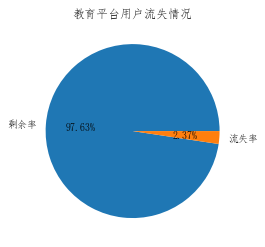

In [14]:
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = ['FangSong']
plt.title("教育平台用户流失情况")
plt.pie(x,labels=['剩余率','流失率'],autopct='%0.2f%%')
plt.show()
plt.close()

In [15]:
DataFirst = read_csv("data1.csv",encoding="gbk")
DataFirst['learn_process'] = DataFirst['learn_process'].str.split(':',expand=True)[1]
DataFirst['learn_process'] = DataFirst['learn_process'].str.split('%',expand = True)[0].astype('int')
DataFirst.head()

,user_id,course_id,course_join_time,learn_process,price
0,用户3,课程106,2020-04-21 10:11:50,0,0.0
1,用户3,课程136,2020-03-05 11:44:36,1,0.0
2,用户3,课程205,2018-09-10 18:17:01,63,0.0
3,用户4,课程26,2020-03-31 10:52:51,0,319.0
4,用户4,课程34,2020-03-31 10:52:49,0,299.0


In [16]:
result = DataFirst['learn_process'].values
result

array([  0,   1,  63, ..., 100,   0,   4])

In [17]:
First_Data = []
Second_Data = []
Third_Data = []
Fouth_Data = []
Fifth_Data = []
for i in range(len(result)):
    data_learn_process = result[i]
    if(data_learn_process<=20):
        First_Data.append(data_learn_process)
    if(data_learn_process<=40):
        Second_Data.append(data_learn_process)
    if(data_learn_process<=60):
        Third_Data.append(data_learn_process)
    if(data_learn_process<=80):
        Fouth_Data.append(data_learn_process)
    if(data_learn_process<=100):
        Fifth_Data.append(data_learn_process)

First_Data =len(First_Data)
Second_Data = len(Second_Data)
Third_Data = len(Third_Data)
Fouth_Data = len(Fouth_Data)
Fifth_Data = len(Fifth_Data)
print(First_Data)

159908


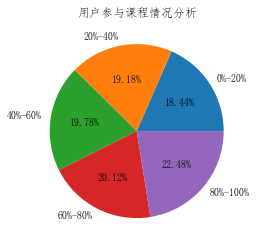

In [19]:
x = [First_Data,Second_Data,Third_Data,Fouth_Data,Fifth_Data]
plt.rcParams['font.sans-serif'] = ['FangSong']
plt.title("用户参与课程情况分析")
plt.pie(x,labels=['0%-20%','20%-40%','40%-60%','60%-80%','80%-100%'],autopct='%0.2f%%')
plt.show()

In [20]:
DataFirst.head()

,user_id,course_id,course_join_time,learn_process,price
0,用户3,课程106,2020-04-21 10:11:50,0,0.0
1,用户3,课程136,2020-03-05 11:44:36,1,0.0
2,用户3,课程205,2018-09-10 18:17:01,63,0.0
3,用户4,课程26,2020-03-31 10:52:51,0,319.0
4,用户4,课程34,2020-03-31 10:52:49,0,299.0


In [21]:
DataFirst_course_id = DataFrame(DataFirst['course_id'].value_counts())
DataFirst_course_id['course_id']

课程76     13265
课程31      9521
课程17      8505
课程191     7126
课程180     6223
课程52      6105
课程34      5709
课程171     5437
课程50      5342
课程12      4829
课程26      4716
课程48      4520
课程141     4429
课程130     4373
课程133     4274
课程163     4067
课程40      4014
课程51      4011
课程135     4006
课程29      3998
课程144     3982
课程158     3794
课程148     3719
课程162     3628
课程132     2871
课程56      2743
课程201     2703
课程203     2637
课程167     2144
课程20      1865
课程24      1792
课程53      1741
课程22      1661
课程66      1541
课程65      1503
课程37      1457
课程210     1404
课程184     1273
课程33      1270
课程67      1087
课程94      1034
课程175      995
课程173      985
课程207      919
课程209      876
课程14       840
课程149      776
课程4        769
课程117      723
课程123      720
课程32       692
课程19       665
课程124      651
课程143      594
课程174      576
课程98       574
课程113      570
课程134      569
课程214      563
课程101      482
课程36       478
课程202      439
课程121      439
课程216      437
课程6        416
课程218      400
课程7       

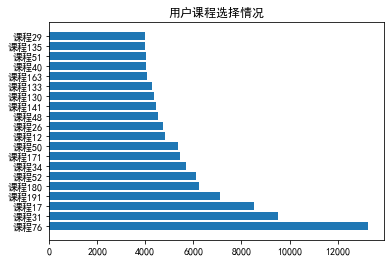

In [22]:
y = DataFirst_course_id['course_id'][:20]
y
plt.barh(range(20),y)
plt.title('用户课程选择情况')
plt.rcParams['font.sans-serif']='SimHei'
# plt.rcParams['axes.unicode_minus'] = True
plt.yticks(range(20),DataFirst_course_id.index[:20])
plt.show()

In [23]:
DataFirst.head()
DataFirst.sort_values(by='price').tail()
DataFirst.dropna(axis=0,inplace=True)
DataFirst.isnull().sum()
DataFirst.drop_duplicates(['course_id'],inplace=True,ignore_index=True)

In [24]:
DataFirst

,user_id,course_id,course_join_time,learn_process,price
0,用户3,课程106,2020-04-21 10:11:50,0,0.0
1,用户3,课程136,2020-03-05 11:44:36,1,0.0
2,用户3,课程205,2018-09-10 18:17:01,63,0.0
3,用户4,课程26,2020-03-31 10:52:51,0,319.0
4,用户4,课程34,2020-03-31 10:52:49,0,299.0
5,用户4,课程22,2020-03-31 10:52:47,0,199.0
6,用户4,课程17,2020-03-31 10:52:45,0,299.0
7,用户4,课程31,2020-03-31 10:52:43,0,109.0
8,用户4,课程4,2020-03-13 11:15:30,2,369.0
9,用户4,课程56,2020-03-03 10:49:29,0,299.0


In [25]:
from matplotlib import pyplot as plt

,learn_process,price
learn_process,1.000000,0.046537
price,0.046537,1.000000


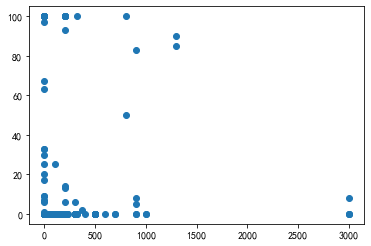

In [26]:
plt.scatter(DataFirst.price,DataFirst.learn_process)
DataFirst.corr()

In [27]:
print('不存在相关性')

不存在相关性


In [28]:
import re
import jieba
import matplotlib.pyplot as plt 
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts import options
from pyecharts.charts import Page,Pie
from interval import Interval
import time

平台用户分布情况

In [29]:
set_option('display.max_rows',None) 

In [30]:
def country_first():
    DataThird = read_csv("data3.csv",encoding="gbk")
    DataThird.isnull().sum()
    DataThird = DataThird.dropna(axis=0)
    DataThird.isnull().sum()
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('中国.*','中国',x))
    DataThird['login_place'].value_counts()
    DataThird['login_place'].count()
    result = DataThird[DataThird['login_place']!= '中国']
    result = result['login_place'].value_counts()
    dict = {'国家':result.index,'人数':result.values}
    result = DataFrame(dict)
    result['用户占比'] = result['人数']/result['人数'].sum()
    plt.plot(result['国家'],result['用户占比'],color="red", marker='o')
    plt.rcParams['font.sans-serif']='SimHei'
    plt.show()
    plt.close()

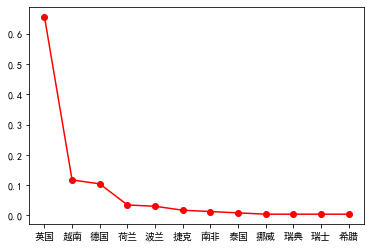

In [31]:
country_first()

该平台在各个省份情况

In [32]:
def map_draw():
    DataThird = read_csv("data3.csv",encoding="gbk")
    DataThird = DataThird.dropna(axis=0)
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*广东.*','广东',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*广西.*','广西',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*湖南.*','湖南',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*湖北.*','湖北',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*北京.*','北京',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*黑龙江.*','黑龙江',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*重庆.*','重庆',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*上海.*','上海',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*贵州.*','贵州',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*陕西.*','陕西',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*四川.*','四川',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*安徽.*','安徽',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*西藏.*','西藏',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*浙江.*','浙江',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*河南.*','河南',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*河北.*','河北',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*江苏.*','江苏',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*山西.*','山西',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*江西.*','江西',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*天津.*','天津',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*新疆.*','新疆',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*青海.*','青海',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*内蒙古.*','内蒙古',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*宁夏.*','宁夏',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*甘肃.*','甘肃',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*云南.*','云南',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*台湾.*','台湾',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*福建.*','福建',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*山东.*','山东',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*山西.*','山西',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*吉林.*','吉林',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*海南.*','海南',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*辽宁.*','辽宁',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*澳门.*','澳门',x))
    DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.sub('.*香港.*','香港',x))
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='英国'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='捷克'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='南非'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='德国'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='波兰'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='瑞士'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='瑞典'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='希腊'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='挪威'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='泰国'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='荷兰'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='越南'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='中国'].index)
    result = DataThird['login_place'].value_counts()
    dicts = {'省份':result.index,'人数':result.values}
    result = DataFrame(dicts)
    average = result['人数'].sum()//result['省份'].count()
    c = (
        Map()
        .add('', [(i,j) for i ,j in zip(result['省份'],result['人数'])], 'china')
        .set_global_opts(
            title_opts=opts.TitleOpts(title="各个省份用户分布情况"),
            visualmap_opts=opts.VisualMapOpts(max_=11159))
    )
    return c

In [33]:
c = map_draw()

In [34]:
c.render_notebook()

该平台在重要省份情况

In [35]:
def change(DataThird):
    DataThird = DataThird.dropna(axis=0)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='英国'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='捷克'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='南非'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='德国'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='波兰'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='瑞士'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='瑞典'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='希腊'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='挪威'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='泰国'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='荷兰'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='越南'].index)
    DataThird = DataThird.drop(DataThird[DataThird.login_place=='中国'].index)
    result = DataThird['login_place'].value_counts()
    dict2 = {"地区":result.index,"用户人数":result.values}
    data_new = DataFrame(dict2)
    data_new.drop(index=0,inplace=True)
    data_new.reset_index(drop=True,inplace=True)
    locate = data_new['地区']
    len(locate)
    data_final = []
    for i in range(len(locate)):
        data_final.append(locate[i][0])
    data_new['地区']=data_final
    data_new
    c = (
        Pie()
        .add("",[list(z) for z in zip(data_new['地区'],data_new['用户人数'])],
        radius=["50%","80%"],
            )
        .set_global_opts(
            title_opts=opts.TitleOpts(title="pie-radius"),
            legend_opts=opts.LegendOpts(orient="vertical",pos_top="5%",pos_left="2%"),
    )
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{c}")
        )
    )
    return c


In [36]:
DataThird = read_csv("data3.csv",encoding="gbk")
DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.findall('广东.*',x))
c = change(DataThird)
c.render_notebook()

In [37]:
DataThird = read_csv("data3.csv",encoding="gbk")
DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.findall('湖北.*',x))
c = change(DataThird)
c.render_notebook()

In [38]:
DataThird = read_csv("data3.csv",encoding="gbk")
DataThird['login_place']= DataThird['login_place'].astype('str').apply(lambda x:re.findall('贵州.*',x))
c = change(DataThird)
c.render_notebook()

用户活跃度分析

In [39]:
def time_choose():
    DataThird = read_csv("data3.csv",encoding="gbk")
    DataThird['login_data']=nan
    for i in range(len(DataThird['login_data'])):
        DataThird['login_data'][i] = DataThird['login_time'][i][:10]
    DataThird['login_time_1']=nan
    for i in range(len(DataThird['login_data'])):
        DataThird['login_time_1'][i] = DataThird['login_time'][i][11:]
    DataThird['login_week']=nan
    DataThird['login_workingday1']=nan
    data = DataThird['login_data'].astype('str')
    for i in range(len(data)):
        b=time.strptime(data[i],"%Y-%m-%d")
        DataThird['login_week'][i]='星期' + str(b.tm_wday+1)
        if b.tm_wday<=4:
            DataThird['login_workingday1'][i]='工作日'
        if b.tm_wday>4:
            DataThird['login_workingday1'][i]='非工作日 '
    for i in range(len(DataThird)):
        if DataThird['login_week'][i]=='星期4':
            DataThird['login_week'][i]='星期四'
        if DataThird['login_week'][i]=='星期5':
            DataThird['login_week'][i]='星期五'
        if DataThird['login_week'][i]=='星期6':
            DataThird['login_week'][i]='星期六'
        if DataThird['login_week'][i]=='星期7':
            DataThird['login_week'][i]='星期天'
        if DataThird['login_week'][i]=='星期3':
            DataThird['login_week'][i]='星期三'
        if DataThird['login_week'][i]=='星期2':
            DataThird['login_week'][i]='星期二'
        if DataThird['login_week'][i]=='星期1':
            DataThird['login_week'][i]='星期一'      
    list = ['2018-09-24','2018-12-30','2019-01-01','2020-01-01','2019-01-02','2020-01-24','2020-01-25','2020-01-26','2020-01-27','2020-01-28','2020-01-29','2020-01-30','2020-04-06','2020-05-01','2020-05-04','2020-05-05']
    list_1 = ['2018-09-29','2018-09-30','2018-12-29','2019-02-02','2019-02-03','2019-04-28','2019-05-05','2019-09-29','2019-10-12','2020-01-19','2020-02-01','2020-04-26','2020-05-09']
    DataThird['login_workingday2']=DataThird['login_workingday1']
    result =  DataThird['login_data'].astype('str').apply(lambda x:re.findall('.*-10-01|.*-10-02|.*-10-03|.*-10-04|.*-10-05|.*-10-06|.*-10-07',x))
    result = result.value_counts()
    dicty = {"索引":result.index,"值":result.values}
    result = DataFrame(dicty)
    result.drop(index=0)
    for i in range(1,13):
        list.append(result['索引'][i][0])    
    list

    for i in  range(len(DataThird['login_data'])):
        if DataThird['login_data'][i] in list:
            DataThird['login_workingday2'][i]='非工作日'
        if DataThird['login_data'][i] in list_1:
            DataThird['login_workingday2'][i]='工作日'
    result =  DataThird['login_data'].astype('str').apply(lambda x:re.findall(
        '.*19-02-04|.*19-02-05|.*19-02-06|.*19-02-07|.*19-02-08|.*19-02-09|.*19-02-10|.*19-04-05|.*19-05-01|.*19-05-02|.*19-05-03|.*19-06-07|.*19-09-13|',x))

    result = result.value_counts()
    dicty = {"索引":result.index,"值":result.values}
    result = DataFrame(dicty)
    result.drop(index=0)
    for i in range(1,7):
        list.append(result['索引'][i][0])    

    for i in  range(len(DataThird['login_data'])):
        if DataThird['login_data'][i] in list:
            DataThird['login_workingday2'][i]='非工作日'
            
    list = [Interval("00:00:01","01:00:00"),
            Interval("01:00:01","02:00:00"),
            Interval("02:00:01","03:00:00"),
            Interval("03:00:01","04:00:00"),
            Interval("04:00:01","05:00:00"),
            Interval("05:00:01","06:00:00"),
            Interval("06:00:01","07:00:00"),
            Interval("07:00:01","08:00:00"),
            Interval("08:00:01","09:00:00"),
            Interval("09:00:01","10:00:00"),
            Interval("10:00:01","11:00:00"),
            Interval("11:00:01","12:00:00"),
            Interval("12:00:01","13:00:00"),
            Interval("13:00:01","14:00:00"),
            Interval("14:00:01","15:00:00"),
            Interval("15:00:01","16:00:00"),
            Interval("16:00:01","17:00:00"),
            Interval("17:00:01","18:00:00"),
            Interval("18:00:01","19:00:00"),
            Interval("19:00:01","20:00:00"),
            Interval("20:00:01","21:00:00"),
            Interval("21:00:01","22:00:00"),
            Interval("22:00:01","23:00:00"),
            Interval("23:00:01","24:00:00"),]
    DataThird['login_time_1'][1]
    second = []
    DataFouth = DataThird[DataThird['login_workingday2']=='工作日']
    DataFouth.reset_index(drop=True,inplace=True)
    second = []
    def number(j):
        first =[]
        for i in range(len(DataFouth['login_time_1'])):
            if DataFouth['login_time_1'][i] in list[j]:
                first.append(DataFouth['login_time_1'][i])
        second.append(len(first))
        return second

    for i in range(len(list)):
        number(i)

    Datasix = DataFrame(second,columns=['working_count'])
    Datasix.insert(0,'middle',0)
    for i in range(len(Datasix['middle'])):
        Datasix['middle'][i]=list[i]
    Datasix

    second = []
    def number_2(j):
        first =[]
        for i in range(len(DataThird['login_time_1'])):
            if DataThird['login_time_1'][i] in list[j]:
                first.append(DataThird['login_time_1'][i])
        second.append(len(first))
        return second

    for i in range(len(list)):
        number_2(i)

    Datasix.insert(2,'sum',second)
    second = []
    def number_3():
        first =[]
        for i in range(len(Datasix)):
            second.append(Datasix['sum'][i] - Datasix['working_count'][i])
        return second
    second = number_3()
    Datasix.insert(2,'holiday_count',second)
    Datasix.insert(2,'working_min',Datasix['working_count']//59)
    Datasix.insert(4,'holiday_min',Datasix['holiday_count']//59)
    plt.figure(figsize=(10,15))
    plt.subplot(211)
    plt.title('各个时间段访问人数')
    plt.bar(Datasix.index,Datasix['working_count'],data=Datasix,label='工作日')
    plt.plot(Datasix.index,Datasix['holiday_count'],color="red",label='非工作日')
    plt.grid(True)
    plt.legend(prop={'size': 10})
    plt.show()
    plt.figure(figsize=(10,15))
    plt.subplot(211)
    plt.title('各个时间段中单位时间访问人数')
    plt.bar(Datasix.index,Datasix['working_min'],data=Datasix,label='工作日')
    plt.plot(Datasix.index,Datasix['holiday_min'],color="red",label='非工作日')
    plt.legend(prop={'size': 10})
    plt.grid(True)
    plt.show()

<ipython-input-39-9f327afe1f72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataThird['login_data'][i] = DataThird['login_time'][i][:10]
C:\Users\master\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-39-9f327afe1f72>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataThird['login_time_1'][i] 

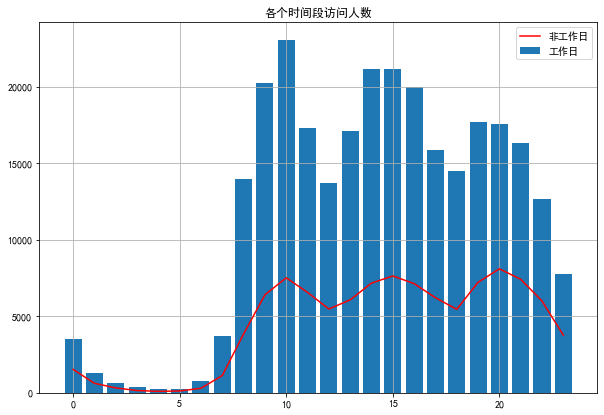

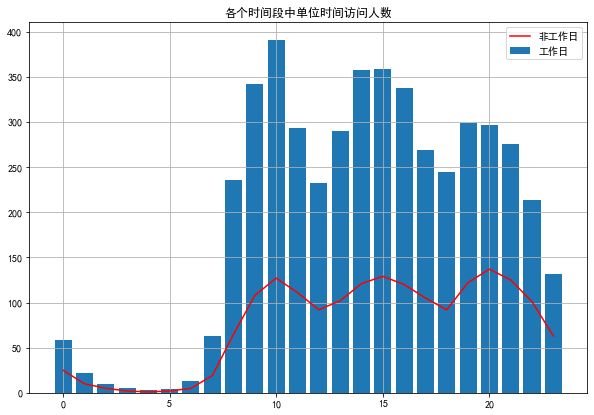

In [40]:
time_choose()

用户占比

In [41]:
data = read_csv("data1.csv",encoding="gbk")
def zhanbi(data):
    result = data['course_id'].value_counts()
    first = result[result>10000].sum()
    second =  result[(result>5000) & (result<10000)].sum()
    third = result[(result>1000) & (result<5000)].sum()
    fouth = result[(result>500) & (result<1000)].sum()
    fifth = result[(result>100) & (result<500)].sum()
    six = result [(result<100)].sum()
    plt.figure(figsize=(10,10))
    plt.title("用户选课占比")
    plt.pie((first,second,third,fouth,fifth,six),labels=["选课10000人以上","选课5000-10000人","选课1000-5000人","选课500-1000人","选课100-500人","选课100以下"], autopct='%.2f%%')
    k = plt.show()
    return k

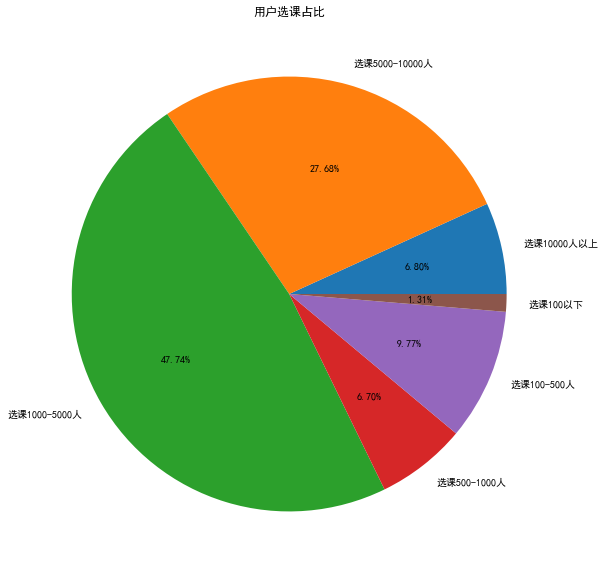

In [42]:
zhanbi(data)

受欢迎程度

In [43]:
data = read_csv("data1.csv",encoding="gbk")
result = data['course_id'].value_counts().head(10)
def count(data,i):
    welcome = result[i]/result.max()
    return welcome

def finnal(result):
    finnal = DataFrame(result.head(10))
    welcome = []
    for i in range(10):
        welcome.append(count(result[i],i))
    finnal.insert(1,'welcome',welcome)
    finnal.insert(2,'sort',0)
    for i in range(10):
        finnal['sort'][i] = i+1
    plt.figure(figsize=(13,10))
    plt.bar(finnal.index,finnal['course_id'])
    plt.rcParams['font.sans-serif']='SimHei'
    ax2 = plt.twinx()
    ax2.plot(finnal.index,finnal['welcome'],color="red")
    s = plt.show()
    return s

<ipython-input-43-5bb82b33f10f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finnal['sort'][i] = i+1


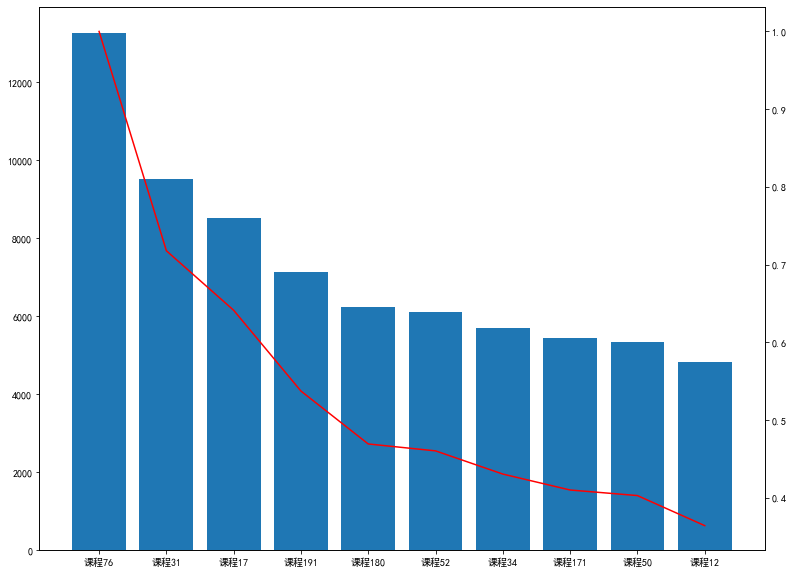

In [44]:
finnal(result)

用户流失率

In [45]:
data_second = read_csv("data2.csv",encoding="gbk")
data_second['last_time'] = '2020-06-18'
data_second.loc[:,'last_time'] = to_datetime(data_second.loc[:,'last_time'], format='%Y-%m-%d %H:%M',errors='coerce')
data_second.loc[:,'recently_logged'] = to_datetime(data_second.loc[:,'recently_logged'].astype(str), format='%Y-%m-%d %H:%M', errors='coerce')
data_second['last_time'] = '2020-06-18 23:00:00'
data_second.loc[:,'last_time'] = to_datetime(data_second.loc[:,'last_time'], format='%Y-%m-%d %H:%M',errors='coerce')
data_second = data_second.dropna(subset=['recently_logged'], how='any')
data_second['no_access_time'] = (data_second['last_time'] - data_second['recently_logged']).dt.days
loss_users = data_second[data_second['no_access_time'] > 90]
loss_users_rate = round((loss_users.count() / data_second.count())[0], 4)

In [46]:
loss_users_rate

0.6007

推荐课程

In [47]:
data = read_csv("data1.csv",encoding="gbk")
def recommend_result(data):
    user_course = data[['user_id','course_id']]
    user_course
    user_course.dtypes
    user_list = set(user_course['user_id'].values)
    course_list = set(user_course['course_id'].values)
    ui_matrix = DataFrame(0,index=user_list, columns=course_list)
    item_matrix = DataFrame(0,index=course_list, columns=course_list)
    for i in item_matrix.index:
        for j in item_matrix.index:
            a = sum(ui_matrix.loc[:,[i,j]].sum(axis=1)==2)
            b = sum(ui_matrix.loc[:,[i,j]].sum(axis=1)!=0)
            item_matrix.loc[i,j] = a/b
    for i in item_matrix.index:
        item_matrix.loc[i,i]=0
    data.sort_values(by=['learn_process'], ascending=False, inplace=True, na_position='first')
    student_f5 = data.head(5)[['user_id','course_id']]
    data.head()
    # 测试集 用户物品矩阵
    user_list_test = set(student_f5['user_id'].values)
    course_list_test = set(student_f5['course_id'].values)
    ui_matrix_test = DataFrame(0,index=user_list_test, columns=course_list_test)
    for i in student_f5.index:
        ui_matrix_test.loc[student_f5.loc[i,'user_id'],student_f5.loc[i,'course_id']] = 1
    res = DataFrame('nan', index=student_f5.index, columns=['用户 id','已选课程','推荐课程','T/F'])
    # 推荐 3 门课程
    res.loc[:,'用户_id'] = list(student_f5.iloc[:,0])
    res.loc[:,'已选课程'] = list(student_f5.iloc[:,1])
    # 开始推荐
    for i in res.index:
        if res.loc[i,'已选课程'] in list(item_matrix.index):
            res.loc[i,'推荐课程'] = item_matrix.loc[res.loc[i,'已选课程'],:].argmax()
            if res.loc[i,'推荐课程'] in course_list_test:
                res.loc[i,'T/F']=ui_matrix.loc[res.loc[i,'用户 id'], res.loc[i,'推荐课程']]==1
            else:
                res.loc[i,'T/F'] = False
    return res

In [48]:
res_first = recommend_result(data)

<ipython-input-47-263bbca6a072>:14: RuntimeWarning: invalid value encountered in longlong_scalars
  item_matrix.loc[i,j] = a/b


In [49]:
res_first

,用户 id,已选课程,推荐课程,T/F,用户_id
107437,nan,课程136,148,False,用户31125
37439,nan,课程21,100,False,用户14987
81386,nan,课程4,21,False,用户27488
37421,nan,课程21,100,False,用户14978
37423,nan,课程21,100,False,用户14979


学习程度与价格关系

In [53]:
from seaborn import relplot
data1 = read_csv("data1.csv",encoding="gbk")
data1 = data1.drop(data1[data1.price == 0].index)
data1 = data1.dropna(axis=0)
data1.reset_index(drop=True,inplace=True)
data1['learn_process'] = data1['learn_process'].str.split(':',expand=True)[1]
data1['learn_process'] = data1['learn_process'].str.split('%',expand = True)[0].astype('int')

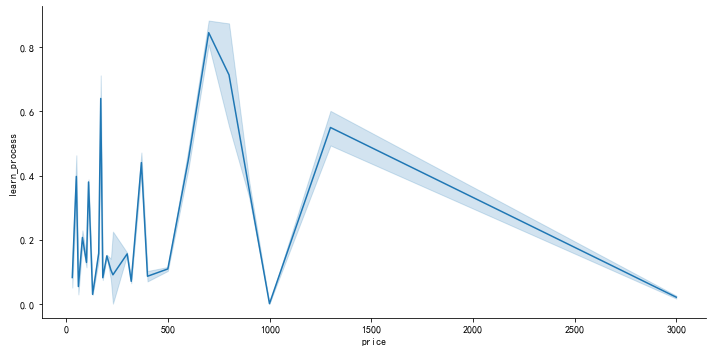

In [55]:
relplot(x=data1['price'],y=data1['learn_process']/100,kind='line',aspect=2)
plt.show()
plt.close()

In [56]:
price = 0
data1.reset_index(drop=True,inplace=True)
for m in range(len(data1)):
    price = price + data1['price'][m]

In [57]:
price

36586009.0

In [62]:
data2 = read_csv("data1.csv",encoding="gbk")
data2['learn_process'] = data2['learn_process'].str.split(':',expand=True)[1]
data2['learn_process'] = data2['learn_process'].str.split('%',expand = True)[0].astype('int')

In [63]:
len(data2)

194974

In [61]:
result = price/len(data2)
result

187.64557838481028

标准差

In [64]:
from math import *

In [65]:
second = 0
for n in range(len(data1)):
    second = pow(data1['price'][n]-result,2)+second

In [66]:
second

24853729368.450474

In [67]:
finnal = second/len(data1)

119648

In [68]:
finnal

207723.73435787036

In [69]:
sqrt(finnal)

455.76719315662723